In [349]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import gridspec
import numpy as np  
from gcs import path_handler as ph
import gcs
import stream_analysis as sa
import pandas as pd

In [350]:
def extract_to_tail_coordinates(orbitpath,streampath,montecarlokey,internal_dynamics,NP):
    """
    Here to extract the raw data and transform the stream to tail coordinates in one go
    """

    time_of_interest,nDynTimes=0,2
    tOrb,xGCv,yGCv,zGCv,vxGCv,vyGCv,vzGCv = gcs.extractors.GCOrbits.extract_whole_orbit(orbitpath,montecarlokey=montecarlokey)
    tOrb,xGCv,yGCv,zGCv,vxGCv,vyGCv,vzGCv=sa.tailCoordinates.filter_orbit_by_dynamical_time(tOrb,xGCv,yGCv,zGCv,vxGCv,vyGCv,vzGCv,time_of_interest,nDynTimes)
    _,xp,yp,zp,vxp,vyp,vzp = gcs.extractors.Stream.extract_old_streams(streampath,internal_dynamics=internal_dynamics,montecarlokey=montecarlokey,NP=NP)
    xT,yT,zT,vxT,vyT,vzT,_ = sa.tailCoordinates.transform_from_galactico_centric_to_tail_coordinates(xp,yp,zp,vxp,vyp,vzp,tOrb,xGCv,yGCv,zGCv,vxGCv,vyGCv,vzGCv,t0=time_of_interest)
    return xT,yT,zT,vxT,vyT,vzT

In [577]:
GCname = "Pal5"
NP = int(1e5)
internal_dynamics = "isotropic-plummer"
montecarlokey="monte-carlo-020"
orbitPotential = "pouliasis2017pii-GCNBody"
streamPotential = "pouliasis2017pii-GCNBody"


In [578]:
orbitpath = ph.GC_orbits(MWpotential=orbitPotential,GCname=GCname)
streampath =ph.old_streams(MWpotential=streamPotential, GCname=GCname,montecarlokey=montecarlokey,NP=NP)
xT,yT,zT,vxT,vyT,vzT=extract_to_tail_coordinates(orbitpath,streampath,montecarlokey,internal_dynamics,NP)

In [579]:
XX,YY,H=sa.plotters.binned_density.short_cut(NP,xT,yT,[-10,10],[-1,1])
H=sa.plotters.binned_density.normalize_density_by_particle_number(H,NP)

In [580]:
mcindex = montecarlokey.split("-")[-1]
title = "Sampling "+mcindex
cbarlabel=r"Density [$N_p/N$]"
normalScatterProperties = {
    "alpha":0.9, 
    "s":1,
    "cmap":'rainbow',
    "norm":colors.LogNorm(vmin=1e-5, vmax=1e-3)
    }
AXIS={
    "xlabel":"$x_{tail}$ [kpc]",
    "ylabel":"$y_{tail}$ [kpc]",
    "xlim":[-10,10],
    "ylim":[-0.5,0.5],
    "yticks": [0,0.5],
    "xticks": np.arange(-10,11,2),
    "yticks": np.arange(-0.4,0.5,0.2),
    "title":title,
}


In [581]:
# Configure Matplotlib to use LaTeX for text rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use 'serif' or specify the exact font family
    "font.serif": ["Times New Roman"],  # Replace with the font used in your LaTeX document
    "axes.labelsize": 12,  # Font size for axis labels
    "font.size": 12,  # General font size
    "legend.fontsize": 12,  # Font size for legend
    "xtick.labelsize": 12,  # Font size for x-axis tick labels
    "ytick.labelsize": 12,  # Font size for y-axis tick labels
})

In [582]:
results_path=ph.paths['simulations'] + "/ImpactGeometry/pouliasis2017pii-GCNBody/Pal5"+"/AllImpactGeometryByHandAndEye.csv"
results = pd.read_csv(results_path)
withgap=results[results['gap_flag']]
gap_flag=results['gap_flag']
withgap[withgap[gap_flag]['montecarlokey'] == montecarlokey]
# withgap[withgap[gap_flag]['montecarlokey'] == "monte-carlo-011"]

/tmp/ipykernel_332764/3416977724.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  withgap[withgap[gap_flag]['montecarlokey'] == montecarlokey]


,impact_parameter,w_par,w_per,v_rel,alpha,Mass,rplum,T,tau,suspect,montecarlokey,target_number,gap_flag
99,0.048903,278.550121,282.719626,396.888595,-1.744402,778127.951252,0.002874,-0.155318,0.030452,NGC2808,monte-carlo-020,0,True


In [583]:
arrowprops=dict(facecolor='red',edgecolor="white", width=2, headwidth=8)
notes = {
    "monte-carlo-000":[
        dict(text="NGC2808",xy=(5.1,-0.1),xytext=(0,0.2),arrowprops=arrowprops),
        dict(text="NGC5634",xy=(5.8,-0.1),xytext=(3,0.35),arrowprops=arrowprops),
        dict(text="FSR1758",xy=(9,-0.1),xytext=(7,0.3),arrowprops=arrowprops),
        ],
    "monte-carlo-001":[
        dict(text="NGC2808",xy=(5.3,-0.1),xytext=(0,0.2),arrowprops=arrowprops),
        ],
    "monte-carlo-002":[
        dict(text="NGC6715",xy=(-8.5,0.25),xytext=(-8,-0.4),arrowprops=arrowprops),
        ],
    "monte-carlo-003":[
        dict(text="NGC2808",xy=(5.7,-0.1),xytext=(0.5,0.2),arrowprops=arrowprops),
        ],
    "monte-carlo-004":[
        dict(text="NGC2808",xy=(5.1,-0.1),xytext=(0.5,0.2),arrowprops=arrowprops),
    ],
    "monte-carlo-005":[
        dict(text="NGC2808",xy=(5.1,-0.1),xytext=(0.5,0.3),arrowprops=arrowprops),
        dict(text="NGC7089",xy=(-6.8,0.15),xytext=(-6.5,-0.45),arrowprops=arrowprops),
    ],
    "monte-carlo-006":[
        dict(text="NGC2808",xy=(4.6,-0.1),xytext=(0.5,0.2),arrowprops=arrowprops),
        dict(text="NGC6656",xy=(3.1,-0.2),xytext=(-0.5,-0.45),arrowprops=arrowprops),
    ],
    "monte-carlo-007":[
        dict(text="NGC2808",xy=(5.2,-0.1),xytext=(0.5,0.2),arrowprops=arrowprops),
        dict(text="Pal10",xy=(7.6,-0.1),xytext=(8.0,0.35),arrowprops=arrowprops),
    ],
    "monte-carlo-008":[
        dict(text="NGC2808",xy=(5.2,-0.1),xytext=(0.5,0.2),arrowprops=arrowprops),
        dict(text="NGC7089",xy=(7.6,0.1),xytext=(8.0,0.35),arrowprops=arrowprops),
    ],
    "monte-carlo-009":[
        dict(text="NGC2808",xy=(4.9,-0.1),xytext=(0,0.2),arrowprops=arrowprops),
        dict(text="NGC7078",xy=(6.3,-0.1),xytext=(2,0.3),arrowprops=arrowprops),
        dict(text="NGC104",xy=(7.8,-0.1),xytext=(4,0.35),arrowprops=arrowprops),
        ],
    "monte-carlo-010":[
        dict(text="NGC2808",xy=(5.6,-0.1),xytext=(1,0.2),arrowprops=arrowprops),
        ],
    "monte-carlo-011":[
        dict(text="NGC6584",xy=(4.3,-0.1),xytext=(0.5,0.10),arrowprops=arrowprops),
        dict(text="NGC2808",xy=(5.4,-0.12),xytext=(7,0.3),arrowprops=arrowprops),
        ],
    "monte-carlo-012":[
        dict(text="NGC2808",xy=(5.3,-0.12),xytext=(0,0.3),arrowprops=arrowprops),
    ],
    "monte-carlo-013":[
        dict(text="NGC2808",xy=(5.1,-0.12),xytext=(0,0.3),arrowprops=arrowprops),
    ],
    "monte-carlo-014":[
        dict(text="NGC2808",xy=(4.9,-0.12),xytext=(0,0.3),arrowprops=arrowprops),
        dict(text="?",xy=(-5.0,0.03),xytext=(-4.5,-0.35),arrowprops=arrowprops),
    ],
    "monte-carlo-015":[
        dict(text="NGC2808",xy=(5.2,-0.12),xytext=(0,0.3),arrowprops=arrowprops),
    ],
    "monte-carlo-016":[
        dict(text="NGC2808",xy=(5.2,-0.12),xytext=(0,0.3),arrowprops=arrowprops),
    ],
    "monte-carlo-017":[
        dict(text="NGC2808",xy=(4.9,-0.12),xytext=(0,0.3),arrowprops=arrowprops),
    ],
    "monte-carlo-018":[
        dict(text="NGC104",xy=(3.0,0),xytext=(0,0.3),arrowprops=arrowprops),
    ],
    "monte-carlo-019":[
        dict(text="NGC2808",xy=(4.9,-0.12),xytext=(0,0.3),arrowprops=arrowprops),
        dict(text="NGC5824",xy=(6.1,-0.25),xytext=(7.5,0.35),arrowprops=arrowprops),
    ],
    "monte-carlo-020":[
        dict(text="NGC2808",xy=(4.9,-0.12),xytext=(0,0.3),arrowprops=arrowprops),
        # dict(text="NGC5824",xy=(6.1,-0.25),xytext=(7.5,0.35),arrowprops=arrowprops),
    ],

}


In [584]:
outdir = "../paper/"
filename = "gallery_of_gaps_"+montecarlokey+".png"

/tmp/ipykernel_332764/2333666788.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


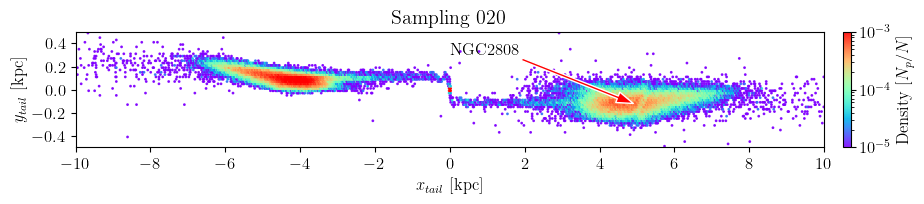

In [585]:
fig=plt.figure(figsize=(10,1.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 0.01],wspace=0.05)
cbar=fig.add_subplot(gs[1])
axis=fig.add_subplot(gs[0])
im = axis.scatter(XX,YY,c=H,**normalScatterProperties)
axis.set(**AXIS);
cbar = plt.colorbar(im, cax=cbar)
cbar.set_label(cbarlabel)
for note in notes[montecarlokey]:
    axis.annotate(**note)

fig.tight_layout()
fig.savefig(outdir+filename,bbox_inches='tight',dpi=300)